<a href="https://colab.research.google.com/github/HossamElsrah/Titanic-EDA-Project/blob/main/Titanic_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Try to impute Missing Values in "Embarked" feature instead of Dropping

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna(df['Embarked'] == 'S', inplace = True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df.groupby(['SibSp']).Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<ipython-input-14-622a3a37f475>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='SibSp' , y='Survived' , data=df , ci=None);


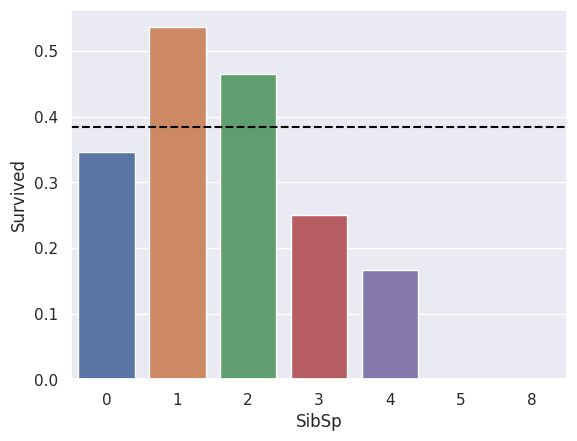

In [ ]:
sns.barplot( x='SibSp' , y='Survived' , data=df , ci=None);
plt.axhline(df.Survived.mean() , color = 'black' , linestyle='--')

In [ ]:
df.groupby(['Parch']).Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

<ipython-input-16-54e392a27e75>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='Parch' , y='Survived' , data=df , ci=None);


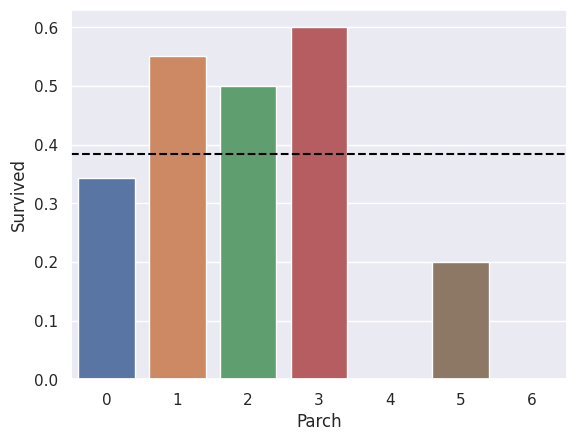

In [ ]:
sns.barplot( x='Parch' , y='Survived' , data=df , ci=None);
plt.axhline(df.Survived.mean() , color = 'black' , linestyle='--')

Create New Feature: "family_size" to combine "parch" and " sibsp" and explore it with Survival Rate

In [ ]:
df['family_size'] = df['Parch'] + df['SibSp']
df.family_size

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_size, Length: 891, dtype: int64

In [ ]:
df.groupby('family_size')['Survived'].value_counts()

family_size  Survived
0            0           374
             1           163
1            1            89
             0            72
2            1            59
             0            43
3            1            21
             0             8
4            0            12
             1             3
5            0            19
             1             3
6            0             8
             1             4
7            0             6
10           0             7
Name: Survived, dtype: int64

In [ ]:
df.groupby('family_size')['Survived'].mean()

family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

<ipython-input-20-88129d0d4ac7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='family_size' , y='Survived' , data=df , ci=None);


Text(0.5, 1.0, 'Survival Rate for Family size')

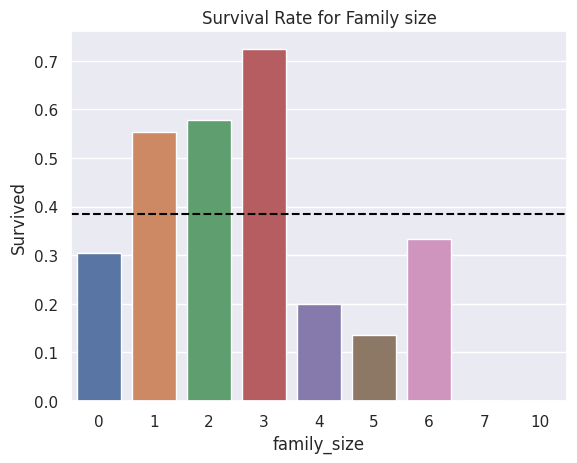

In [ ]:
sns.barplot( x='family_size' , y='Survived' , data=df , ci=None);
plt.axhline(df.Survived.mean() , color = 'black' , linestyle='--')
plt.title('Survival Rate for Family size')

How many passengers were alone? What is their Survival Rate ?

In [ ]:
passengers_alone = df[df["family_size"] == 0]["Survived"].mean()
passengers_alone

0.30353817504655495

In [ ]:
passengers_alone = df[df["family_size"] == 0]["Survived"].value_counts()
passengers_alone

0    374
1    163
Name: Survived, dtype: int64

In [ ]:
passengers_alone_male = (df["family_size"] == 0) & (df["Sex"] == "male")
passengers_alone_female = (df["family_size"] == 0) & (df["Sex"] == "female")

<ipython-input-24-4558d208edd3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='Sex' , y='Survived' , data=df[df["family_size"] == 0] , ci=None);


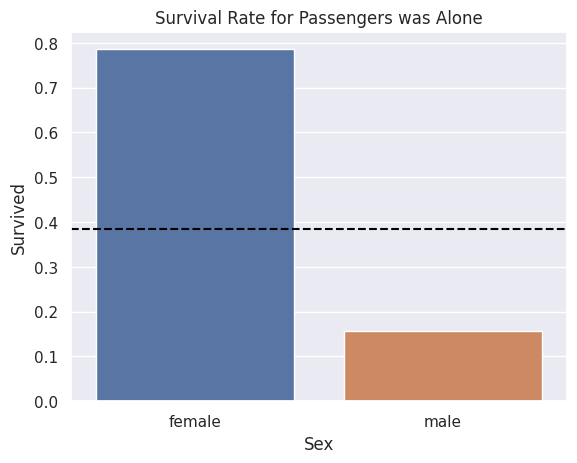

In [ ]:
sns.barplot( x='Sex' , y='Survived' , data=df[df["family_size"] == 0] , ci=None);
plt.axhline(df.Survived.mean() , color = 'black' , linestyle='--')
plt.title('Survival Rate for Passengers was Alone')
plt.show()

What are top 3 categories from "family_size" have highest survival Rate ?

In [ ]:
df.groupby('family_size')['Survived'].mean().sort_values(ascending=False).head(3)

family_size
3    0.724138
2    0.578431
1    0.552795
Name: Survived, dtype: float64

In [ ]:
df.groupby('family_size')['Survived'].mean().nlargest(3)

family_size
3    0.724138
2    0.578431
1    0.552795
Name: Survived, dtype: float64

Try differnet age groups

In [ ]:
df["age_groups"] = pd.cut(df.Age , bins = [0,12,18,35,60,100] , labels = ['kids' , 'young' , 'adult' , 'senior' , 'old'])

In [ ]:
df.age_groups.value_counts()

adult     358
senior    195
young      70
kids       69
old        22
Name: age_groups, dtype: int64

Which age groups has the lowest and highest survival rate for both females and males?

In [ ]:
df['sex_male'] = df['Sex'].apply(lambda x:x == 'male' , True)
df['sex_female'] = df['Sex'].apply(lambda y:y == 'female' , True)

In [ ]:
df['sex_male'].value_counts()

True     577
False    314
Name: sex_male, dtype: int64

In [ ]:
df.groupby(['age_groups' , 'sex_male'])['Survived'].mean().nlargest(1)

age_groups  sex_male
old         False       1.0
Name: Survived, dtype: float64

In [ ]:
df.groupby(['age_groups' , 'sex_male'])['Survived'].mean().nsmallest(1)

age_groups  sex_male
young       True        0.088235
Name: Survived, dtype: float64

In [ ]:
df.groupby(['age_groups' , 'sex_female'])['Survived'].mean().nlargest(1)

age_groups  sex_female
old         True          1.0
Name: Survived, dtype: float64

In [ ]:
df.groupby(['age_groups' , 'sex_female'])['Survived'].mean().nsmallest(1)

age_groups  sex_female
young       False         0.088235
Name: Survived, dtype: float64